# Rice Leaf Disease using CNN

#### The dataset contains images of rice leaf. 
#### There are three classes/diseases: 
            * Bacterial leaf blight 
            * Brown spot and 
            * Leaf smut 
    Each having 40 images. The format of all images are jpg.



## Problem Statement


         * To develop a CNN Model for detection of diseases caused to the Rice Leaf
         * MultiClass Classification (3 Classes)

# PRIOR RESEARCH

#### What is leaf blight disease?

        Leaf blight disease is caused by the fungus Helminthosporium turcicum Pass. The disease develops on sorghum leaves particularly under humid conditions by producing reddish-purple or tan spots that coalesce to form large lesions. It attacks seedlings as well as older plants.

#### How to identify leaf Blight ?

        * Water-soaked to yellowish stripes on leaf blades or starting at leaf tips with a wavy margin
        * Leaves with undulated yellowish white or golden yellow marginal necrosis, drying of leaves back from tip and       curling, leaving mid rib intact are the major symptoms.
        
#### What is Brown Spot ?
            Brown spot is a fungal disease that infects the coleoptile, leaves, leaf sheath, panicle branches, glumes, and spikelets. Its most observable damage is the numerous big spots on the leaves which can kill the whole leaf. When infection occurs in the seed, unfilled grains or spotted or discolored seeds are formed.
            
#### How to identify Brown Spot ?
           * Bacterial leaf spot diseases often start as small dark brown to black spots with a halo of yellow tissue        surrounding each spot.
           * In some cases, the center of the leaf spot will dry up and fall out, giving the leaf a "shot hole" appearance.
           
#### What is Leaf Smut ?
            Leaf smut, caused by the fungus Entyloma oryzae, is a widely distributed, but somewhat minor, disease of rice.
            
#### How to identify Leaf Smut ?
            Many spots can be found on the same leaf, but the spots remain distinct from each other. Typical symptoms of     leaf smut breaks open when wet and releases the black spores. Heavily infected leaves turn yellow, and the leaf tips die and turn gray

### Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt #for plotting the required data 
import pandas as pd # to deal with dataframes if needed
import seaborn as sns  #for plotting
import plotly.express as px  #a better and handy tool with less complexity for plotting
import numpy as np # for handling mutlidimensional array


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense,Dropout, BatchNormalization


from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import load_img,img_to_array

# Reading the dataset and visualizing sample images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# leaf_blight_images
leaf_array = []
for x in range(372,377):
    str_x = str(x)
    file_name = "/content/drive/MyDrive/Data/train/Bacterial leaf blight/DSC_0"+str_x+".JPG"
    try:
        img = load_img(file_name)
    except :
        print("not found")
    img = img.resize([256,256])
    leaf_array.append(img)

In [13]:
# brown_spot_images
brown_array = []
for x in range(100,109):
    str_x = str(x)
    file_name = "/content/drive/MyDrive/Data/train/Brown spot/DSC_0"+str_x+".JPG"
    try:
        img = load_img(file_name)
    except :
        print("not found")
    img = img.resize([256,256])
    #imgarray = img_to_array(img)
    brown_array.append(img)

not found
not found
not found
not found
not found
not found
not found
not found
not found


In [14]:
# leaf_smut_images
leaf_smut = []
for x in range(312,317):
    str_x = str(x)
    file_name = "/content/drive/MyDrive/Data/train/Leaf smut/DSC_0"+str_x+".JPG"
    try:
        img = load_img(file_name)
    except :
        print("not found")
    img = img.resize([256,256])
    #imgarray = img_to_array(img)
    leaf_smut.append(img)

not found


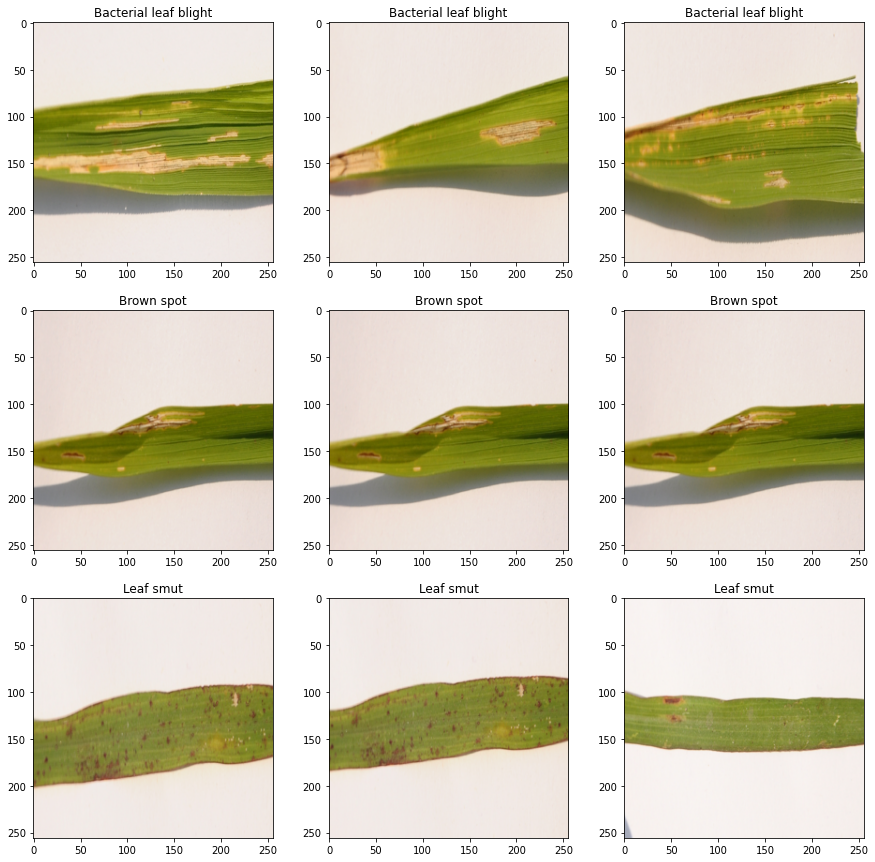

In [15]:
plt.figure(figsize=(15,15))
for x in range(1,4):
    plt.subplot(3,3,x)
    plt.imshow(leaf_array[x-1])
    plt.title("Bacterial leaf blight")
for x in range(4,7):
    plt.subplot(3,3,x)
    plt.imshow(brown_array[x-4])
    plt.title("Brown spot")
for x in range(7,10):
    plt.subplot(3,3,x)
    plt.imshow(leaf_smut[x-7])
    plt.title("Leaf smut")   

## Interprets from the above plottings

* LEAF BLIGHT is faded and pale spots spread over the leaf, looks like dried leaves.
* BROWN SPOT can be identified as brownish spots with varying size and density spread over the leaf. The brownish surrounding with inner faded, yellow flavour.
* LEAF SMUT is a disease that causes brown spots over the leaf, which are of completely brownish polka dots as shown.

#### After Data Visualization and Dimensionality Reduction we can conclude that
* data cant be seperated using and of the ML Algorithms like Logistic Regression,SVM,KNN, Random Forest etc..
* **Hence, CNN MAY HELP IN THIS CASE**

# Loading the Dataset

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode ="reflect")
valid_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
BATCH_SIZE= 32
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/train/',
                                             target_size=(256,256),
                                             batch_size=BATCH_SIZE,
                                             class_mode ='categorical')
valid_generator = valid_datagen.flow_from_directory('/content/drive/MyDrive/Data/validation/',
                                             target_size=(256,256),
                                             batch_size=BATCH_SIZE,
                                             class_mode ='categorical')

Found 2812 images belonging to 3 classes.
Found 538 images belonging to 3 classes.


# Building the model

In [7]:
#seqential model
model = Sequential()

#pass1 
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(256, 256, 3)))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(3,3)))
#pass2
model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(3,3)))
#pass3
model.add(Conv2D(128, kernel_size=(3,3)))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(3,3)))
#pass4
model.add(Conv2D(128, kernel_size=(3,3)))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(3,3)))


#flatten
model.add(Flatten())

from tensorflow.keras.layers import Dropout
#ann
model.add(Dense(128))
model.add(Activation('elu'))
model.add(Dropout(0.4)) #drop neurons to decrease no.of neurons

model.add(Dense(64))
model.add(Activation('elu'))
model.add(Dropout(0.4)) #drop neurons to decrease no.of neurons 

model.add(Dense(32))
model.add(Activation('elu'))
model.add(Dropout(0.4))

model.add(Dense(3))
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 activation_2 (Activation)   (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 82, 82, 64)        36928     
                                                                 
 activation_3 (Activation)   (None, 82, 82, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                  

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss = "categorical_crossentropy",
              metrics =["accuracy"]
             )

# Callbacks

In [10]:
#model_checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

chckpoint = ModelCheckpoint("bestmodel.h5",
                            monitor='val_accuracy',
                            save_best_only=True,
                            verbose=1,
                            mode="max"
                           )

In [11]:
#early stopping
earlystop = EarlyStopping(monitor='val_accuracy',
                          mode="max",
                          min_delta=0.001,
                          patience=15,
                          verbose=10,
                         )

In [12]:
#reduceLROnPlateau
reducelr = ReduceLROnPlateau(monitor='val_accuracy',
                             patience=8,
                             verbose=5,
                             mode='max',
                             min_delta=0,
                             min_lr = 0
                            )

In [13]:
hist = model.fit(train_generator,
                           steps_per_epoch=2812//BATCH_SIZE,
                           epochs=25,
                           verbose=1,
                           validation_data=valid_generator,
                           validation_steps=538//BATCH_SIZE,)

Epoch 1/25
87/87 [==============================] - ETA: 0s - loss: 1.1498 - accuracy: 0.4004
Epoch 00001: val_accuracy improved from -inf to 0.52734, saving model to bestmodel.h5
87/87 [==============================] - 58s 631ms/step - loss: 1.1498 - accuracy: 0.4004 - val_loss: 0.9983 - val_accuracy: 0.5273
Epoch 2/25
87/87 [==============================] - ETA: 0s - loss: 1.0117 - accuracy: 0.4856
Epoch 00002: val_accuracy improved from 0.52734 to 0.57617, saving model to bestmodel.h5
87/87 [==============================] - 55s 635ms/step - loss: 1.0117 - accuracy: 0.4856 - val_loss: 0.9286 - val_accuracy: 0.5762
Epoch 3/25
87/87 [==============================] - ETA: 0s - loss: 0.9275 - accuracy: 0.5522
Epoch 00003: val_accuracy improved from 0.57617 to 0.63086, saving model to bestmodel.h5
87/87 [==============================] - 56s 643ms/step - loss: 0.9275 - accuracy: 0.5522 - val_loss: 0.8150 - val_accuracy: 0.6309
Epoch 4/25
87/87 [==============================] - ETA: 0

In [20]:
model.save("bestmodel.h5")

In [27]:
no_of_epochs_performed = len(hist.history["val_accuracy"])

In [28]:
no_of_epochs_performed

25

Text(0.5, 1.0, 'Accuracy Plots')

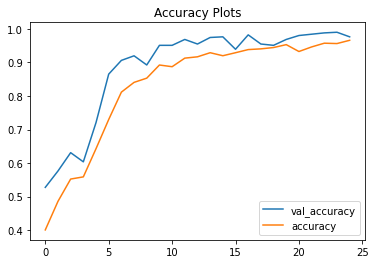

In [29]:
plt.plot(range(no_of_epochs_performed),hist.history["val_accuracy"])
plt.plot(range(no_of_epochs_performed),hist.history["accuracy"])
plt.legend(["val_accuracy","accuracy"])
plt.title("Accuracy Plots")

Text(0.5, 1.0, 'Loss Plots')

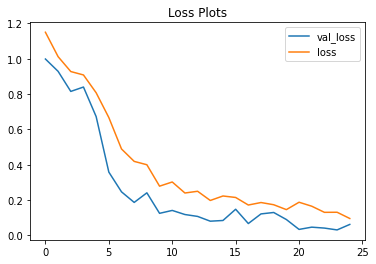

In [19]:
plt.plot(range(no_of_epochs_performed),hist.history["val_loss"])
plt.plot(range(no_of_epochs_performed),hist.history["loss"])
plt.legend(["val_loss","loss"])
plt.title("Loss Plots")

# CONCLUSIONS FROM THE PLOTS

* Here the final epoch results are loss: 0.0961 - accuracy: 0.9662 - val_loss: 0.0625 - val_accuracy: 0.9766
* The val_accuracy > accuracy by 1%. Since the validation data is not very complex due to less samples of original dataset.
* The model is neither overfit nor underfit form the plots.
* Hence, we can say that the model is a good fit model for the given data. 

# Testing the model

#### Class labels 

    * Bacterial Leaf Blight - 0
    * Brown Spot - 1
    * Leaf Smut - 2

In [ ]:
# loading the image
img = load_img("Data/train/Bacterial leaf blight/DSC_0390.jpg")    

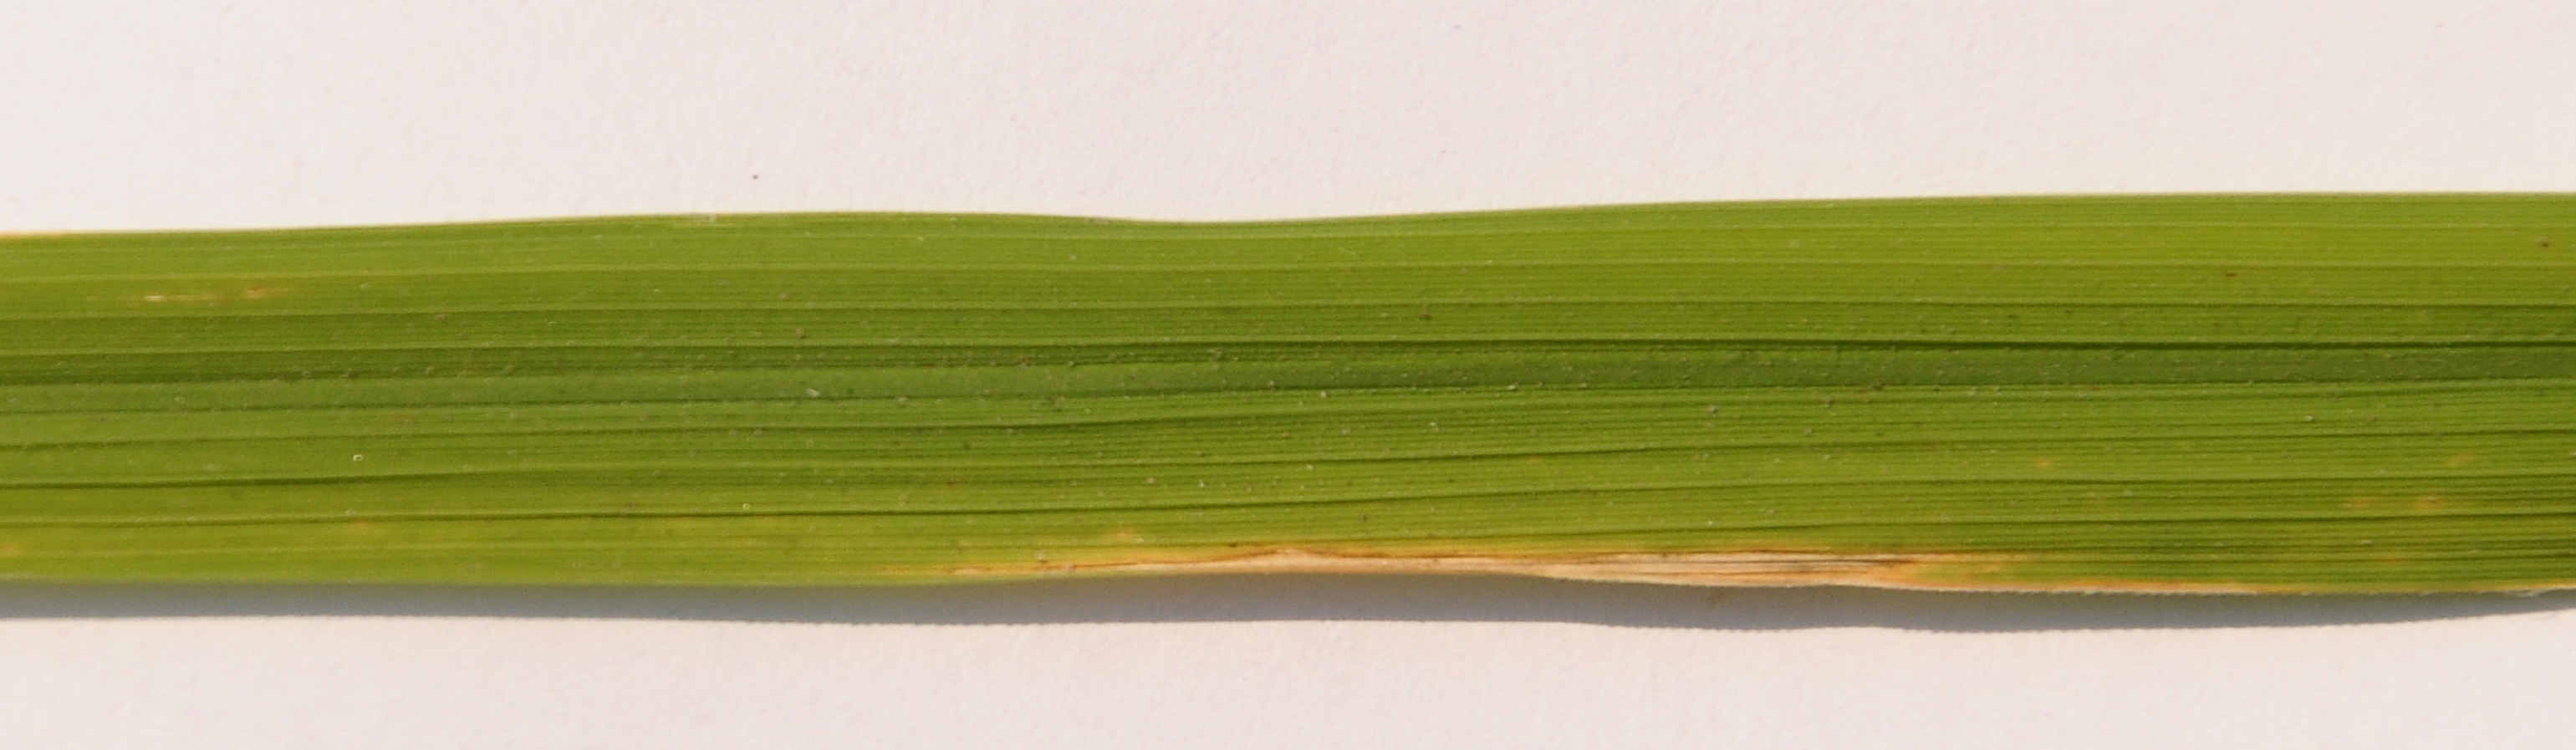

In [3]:
img

In [4]:
img = img.resize((256,256))

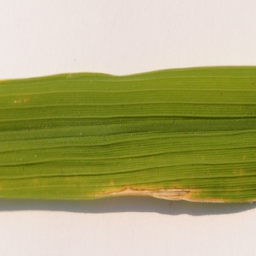

In [5]:
img

In [6]:
img = img_to_array(img)

In [7]:
img.shape

(256, 256, 3)

In [8]:
img = img.reshape((1,)+img.shape)

In [9]:
img.shape

(1, 256, 256, 3)

In [10]:
from tensorflow.keras.models import load_model
model1 = load_model("bestmodel.h5")
pred = model1.predict(img)

In [11]:
pred

array([[1., 0., 0.]], dtype=float32)

In [12]:
np.argmax(pred)

0